# Introductory course to GIS in Python and task-automation

## This course is open and online, offered by University of Helsinki. Let's use it to learn some GIS using pure python, and apply the course content to our data from Argentina. Optimally, by the end of the course, we will have a tool that allows us to import metadata of different data types and display them on a map.

In [1]:
# import required geometries from shapely module
from shapely.geometry import Point, LineString, Polygon
import numpy as np

# Create Point geometric object(s) with coordinates
point1 = Point(0.5, 0.5)
point2 = Point(1.0, -1.0)
point3 = Point(1.5, 0.7)

# a 3D point
point3D = Point(9.26, -2.456, 0.57)

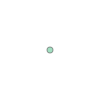

In [2]:
# take a look at point 1 -  it is directly plotted
point1

In [3]:
# print point coordinates
print(point1)
print(point2)
print(point3)
print(point3D)

POINT (0.5 0.5)
POINT (1 -1)
POINT (1.5 0.7)
POINT Z (9.26 -2.456 0.57)


In [4]:
# what's the data type of the point?
type(point1)

shapely.geometry.point.Point

In [5]:
# can shapely also tell us that?
point1.geom_type

'Point'

## let's apply some shapely built-in functions: Firt, we will extract the point coordinates, and display them. This implies how easy it will be to automate queries etc.

In [6]:
xy = point1.xy
x = point1.x
y = point1.y

print('xy coordinates of point 1 are: ', xy)
print('x coordinates of point 1 are: ', x)
print('y coordinates of point 1 are: ', y)

xy coordinates of point 1 are:  (array('d', [0.5]), array('d', [0.5]))
x coordinates of point 1 are:  0.5
y coordinates of point 1 are:  0.5


## finally, let's calculate the distance between all points and find the largest one

In [7]:
dist_p12 = point1.distance(point2)
print('Distance Points 1,2: ', dist_p12)
dist_p13 = point1.distance(point3)
print('Distance Points 1,3: ', dist_p13)
dist_p23 = point2.distance(point3)
print('Distance Points 2,3: ', dist_p23)
#max_dist = np.max(dist_p12,dist_p13,dist_p23)

Distance Points 1,2:  1.5811388300841898
Distance Points 1,3:  1.019803902718557
Distance Points 2,3:  1.772004514666935


In [8]:
dist_max = np.max([dist_p12, dist_p13, dist_p23])
print('largest distance between points: ', dist_max)

largest distance between points:  1.772004514666935


## Now let's create a polyline using our 3 points (from the points or from scratch), look at its data type and perform some simple analyses

In [13]:
line1 = LineString([point1,point2,point3])
line2 = LineString([(0.5, -0.5), (1.0,1.0), (1.5,-0.7)])

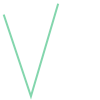

In [14]:
line1

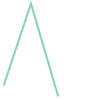

In [15]:
line2

In [16]:
# check the lines numerically:
print('line1: \n', line1, '\n')
print('line2: \n', line2, '\n')

line1: 
 LINESTRING (0.5 0.5, 1 -1, 1.5 0.7) 

line2: 
 LINESTRING (0.5 -0.5, 1 1, 1.5 -0.7) 



In [17]:
# check the time using basic python
type(line1)

shapely.geometry.linestring.LineString

In [19]:
# and using object attribute
line2.geom_type

'LineString'

In [24]:
# let's find the length and centroid (sum of "moments" divided by total length)
l1_length = line1.length
l1_centroid = line1.centroid

l2_length = line2.length
l2_centroid = line2.centroid

In [26]:
print('Length of line 1: ', l1_length)
print('Centroid of line 1: ', l1_centroid)
print('Length of line 2: ', l2_length)
print('Centroid of line 2: ', l2_centroid)

Length of line 1:  3.3531433447511247
Centroid of line 1:  POINT (1.014230355293453 -0.1971539289413094)
Length of line 2:  3.3531433447511247
Centroid of line 2:  POINT (1.014230355293453 0.1971539289413094)


In [27]:
# and calculate the distance between the centroids in two ways:
dist_cent1 = l1_centroid.distance(l2_centroid)
line_between_centroids = LineString([l1_centroid, l2_centroid])
dist_cent2 = line_between_centroids.length

In [28]:
print('distance between centroids (through point distance): ', dist_cent1)
print('distance between centroids (through line length): ', dist_cent2)
if dist_cent1-dist_cent2 == 0.0:
    print('OMG the two methods give the same result!')

distance between centroids (through point distance):  0.3943078578826188
distance between centroids (through line length):  0.3943078578826188
OMG the two methods give the same result!


## Finally, let's look at polygons

In [31]:
print(point1, point2, point3)

POINT (0.5 0.5) POINT (1 -1) POINT (1.5 0.7)


In [35]:
# create the polygon either by passing points as x,y tuples or by looping through their coordinates

poly1 = Polygon([point1, point2, point3])

poly2 = Polygon([[p.x, -p.y] for p in (point1, point2, point3)])

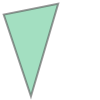

In [36]:
poly1

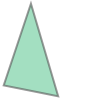

In [37]:
poly2

In [41]:
# again, print numerically and check the type
print(poly1)
print(poly2)
type(poly1)
print('data type: ', poly2.geom_type)

POLYGON ((0.5 0.5, 1 -1, 1.5 0.7, 0.5 0.5))
POLYGON ((0.5 -0.5, 1 1, 1.5 -0.7, 0.5 -0.5))
data type:  Polygon


shapely.geometry.polygon.Polygon

### mhh...what else should we know about Polygons? Let's check the help function

In [43]:
help(Polygon)

Help on class Polygon in module shapely.geometry.polygon:

class Polygon(shapely.geometry.base.BaseGeometry)
 |  Polygon(shell=None, holes=None)
 |  
 |  A two-dimensional figure bounded by a linear ring
 |  
 |  A polygon has a non-zero area. It may have one or more negative-space
 |  "holes" which are also bounded by linear rings. If any rings cross each
 |  other, the feature is invalid and operations on it may fail.
 |  
 |  Attributes
 |  ----------
 |  exterior : LinearRing
 |      The ring which bounds the positive space of the polygon.
 |  interiors : sequence
 |      A sequence of rings which bound all existing holes.
 |  
 |  Method resolution order:
 |      Polygon
 |      shapely.geometry.base.BaseGeometry
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __eq__(self, other)
 |      Return self==value.
 |  
 |  __init__(self, shell=None, holes=None)
 |      Parameters
 |      ----------
 |      shell : sequence
 |          A sequence of (x, y [,z]) numeric coo

### Polygons can have holes... let's make a world polygon with a hole

In [48]:
poly_outer = [(-180, 90), (-180, -90), (180, -90), (180, 90)]
hole_20deg = [[(-160, 70), (-160, -70), (160, -70), (160, 70)]]

world = Polygon(shell=poly_outer)
world_w_hole = Polygon(shell=poly_outer, holes = hole_20deg)

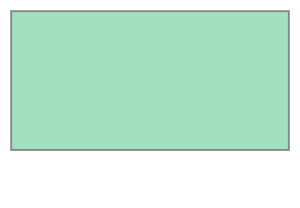

In [45]:
world

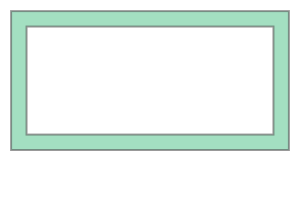

In [49]:
world_w_hole

In [50]:
#let's look at the numerical data, which should be a bit more complex this time
print(world)
print(world_w_hole)
world_w_hole.geom_type

POLYGON ((-180 90, -180 -90, 180 -90, 180 90, -180 90))
POLYGON ((-180 90, -180 -90, 180 -90, 180 90, -180 90), (-160 70, -160 -70, 160 -70, 160 70, -160 70))


'Polygon'

In [51]:
# And finally, look at some build-in attributes (see help output above)

# Get the centroid of the Polygon
world_centroid = world.centroid

# Get the area of the Polygon
world_area = world.area

# Get the bounds of the Polygon (i.e. bounding box)
world_bbox = world.bounds

# Get the exterior of the Polygon
world_ext = world.exterior

# Get the length of the exterior
world_ext_length = world_ext.length

In [52]:
# Print the outputs
print("World centroid: ", world_centroid)
print("World Area: ", world_area)
print("World Bounding Box: ", world_bbox)
print("World Exterior: ", world_ext)
print("World Exterior Length: ", world_ext_length)

World centroid:  POINT (-0 -0)
World Area:  64800.0
World Bounding Box:  (-180.0, -90.0, 180.0, 90.0)
World Exterior:  LINEARRING (-180 90, -180 -90, 180 -90, 180 90, -180 90)
World Exterior Length:  1080.0
